In [2]:
import numpy as np # Library for linear algebra and math utils
import pandas as pd # Dataframe library

import matplotlib.pyplot as plt # Library for plots

Likelihood calculation

In [3]:
data = pd.read_csv('bayes_features.csv')
data.head(5)

,positive,negative,sentiment
0,-45.763393,-63.351354,1.0
1,-105.491568,-114.204862,1.0
2,-57.028078,-67.216467,1.0
3,-10.055885,-18.589057,1.0
4,-125.749270,-138.334845,1.0


Text(0, 0.5, 'Negative')

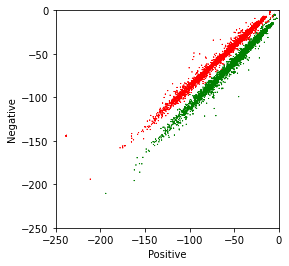

In [5]:
fig, ax = plt.subplots(figsize = (4, 4)) 

colors = ['red', 'green']

ax.scatter(data.positive, data.negative, 
    c=[colors[int(k)] for k in data.sentiment], s = 0.1, marker='*')  # Plot a dot for each tweet

plt.xlim(-250,0)
plt.ylim(-250,0)

plt.xlabel("Positive") 
plt.ylabel("Negative") 

Confidence Ellipse:
used to visulaize 2D random variable
Center: It is the numerical mean of the attributes
Height and width: Related with the variance of each attribute. Desired amount of standard deviations used to plot to be specified by user.
Angle: Related with the covariance among attributes.

In [6]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import numpy as np 

 
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    Returns
    -------
    matplotlib.patches.Ellipse
    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
                      width=ell_radius_x * 2,
                      height=ell_radius_y * 2,
                      facecolor=facecolor,
                      **kwargs)

    # Calculating the stdandard deviation of x from the squareroot of the variance and multiplying with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y 
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

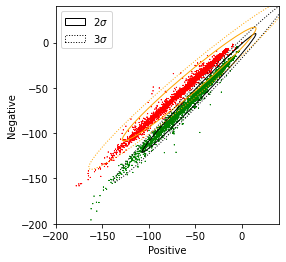

In [7]:
fig, ax = plt.subplots(figsize = (4, 4))
colors = ['red', 'green'] 
ax.scatter(data.positive, data.negative, c=[colors[int(k)] for k in data.sentiment], s = 0.1, marker='*')  # Plot a dot for tweet

plt.xlim(-200,40)  
plt.ylim(-200,40)

plt.xlabel("Positive") 
plt.ylabel("Negative") 

data_pos = data[data.sentiment == 1] # Filter only the positive samples
data_neg = data[data.sentiment == 0] # Filter only the negative samples



# Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')

# Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend()

plt.show()

In [8]:
data2 = data.copy() # Copy the whole data frame

# The following 2 lines only modify the entries in the data frame where sentiment == 1
data2.negative[data.sentiment == 1] =  data2.negative * 1.5 + 50 # Modifiy the negative attribute
data2.positive[data.sentiment == 1] =  data2.positive / 1.5 - 50 # Modifiy the positive attribute 

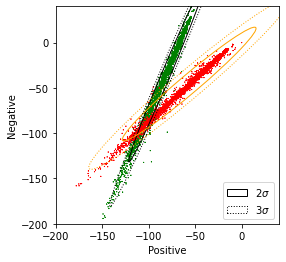

In [10]:
fig, ax = plt.subplots(figsize = (4, 4))

colors = ['red', 'green'] # Define a color palete

# Color base on sentiment

#data.negative[data.sentiment == 1] =  data.negative * 2

ax.scatter(data2.positive, data2.negative, c=[colors[int(k)] for k in data2.sentiment], s = 0.1, marker='*')  # Plot a dot for tweet
# Custom limits for this chart
plt.xlim(-200,40)  
plt.ylim(-200,40)

plt.xlabel("Positive") # x-axis label
plt.ylabel("Negative") # y-axis label

data_pos = data2[data2.sentiment == 1] # Filter only the positive samples
data_neg = data[data2.sentiment == 0] # Filter only the negative samples

# Print confidence ellipses of 2 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, edgecolor='black', label=r'$2\sigma$' )
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, edgecolor='orange')

# Print confidence ellipses of 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor='orange', linestyle=':')
ax.legend()

plt.show()